### Deap

Le module Deap n'a pas la capacité de prendre en compte des contraintes en tant que telles. On utilise donc des fonctions de pénalisation pour les intégrer à l'optimisation.

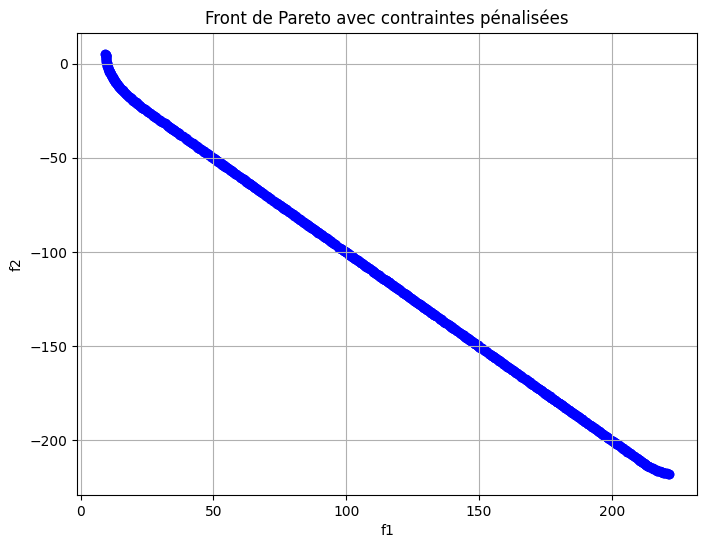

In [1]:
import deap
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

# Définition du problème d'optimisation
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

# Fonction d'évaluation
def evaluate(individual):
    x1, x2 = individual
    f1 = (x1 - 2)**2 + (x2 - 1)**2 + 2
    f2 = 9*x1 - (x2 - 1)**2
    g1 = x1**2 + x2**2 - 225
    g2 = x1 - 3*x2 + 10
    # Pénalisation des contraintes
    penalty = max(0, g1)**2 + max(0, g2)**2
    return f1 + penalty, f2 + penalty

# Définition des bornes des variables
BOUND_LOW, BOUND_UP = -20.0, 20.0
BOUND = [BOUND_LOW, BOUND_UP]

# Création de la toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, BOUND_LOW, BOUND_UP)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate)

# Paramètres de l'algorithme génétique
pop_size = 1000
max_gen = 100

# Création de la population initiale
pop = toolbox.population(n=pop_size)

# Évolution de la population
pop, _ = algorithms.eaMuPlusLambda(pop, toolbox, mu=pop_size, lambda_=pop_size, cxpb=0.7, mutpb=0.2, ngen=max_gen, verbose=False)

# Extraction du front de Pareto
front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]

# Affichage du front de Pareto
front_f1_reel = [ind.fitness.values[0] for ind in front]
front_f2_reel = [ind.fitness.values[1] for ind in front]

plt.figure(figsize=(8, 6))
plt.scatter(front_f1_reel, front_f2_reel, color='blue')
plt.title('Front de Pareto avec contraintes pénalisées')
plt.xlabel('f1')
plt.ylabel('f2')
plt.grid(True)
plt.show()